# CBIR WITH CNN

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

from keras.applications import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [2]:
n_imgs = 100
folders = ["bus-n04487081", "nails-n03804744", "car-n02814533", "collar-n03814639", "plunger-n03970156",
           "cats-n02123394", "monkey-n02480495", "bridges-n04532670", "chair-n04099969", "dog-n02099601",
           "duck-n01855672", "pizza-n07873807", "sea-n09428293", "ipod-n03584254", "banana-n07753592", "gas_mask-n03424325",
           "bow_tie-n02883205", "fly-n02190166", "ice_cream-n07615774", "cannon-n02950826"]
len(folders)


20

In [3]:
def get_images_path(folders, n_imgs):
    images_path = {}
    for folder in folders:
        for i in range(n_imgs):
            images_path[(folder[-7:], str(i))] = f'./dataset/{folder}/{folder[-9:]}_{str(i)}.JPEG'
    return images_path  


In [4]:
images_path = get_images_path(folders, n_imgs)
len(images_path)

2000

In [5]:
def display_n_similar(sorted_indexes, n):
    if n <= 0:
        print("The value of n must be greater than 0.")
        return

    if n > len(sorted_indexes):
        print(f"There are only {len(sorted_indexes)} images in the list. Showing all.")
        n = len(sorted_indexes)
    fig, axs = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        folder_name = (sorted_indexes[i][0])
        n_img = (sorted_indexes[i][1])
        path = images_path[(folder_name, n_img)]
        im = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        axs[i].imshow(im)
        axs[i].axis('off')
        title = f'{folder_name}_{n_img}'
        axs[i].set_title(title)

    plt.show()


In [6]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

In [7]:
if os.path.exists('./npy_mat/CNN_matrix.npy'):
    features = np.load('./npy_mat/CNN_matrix.npy')
else:
    features = np.empty((0, 25090))
    for idx in images_path:
        im = cv2.cvtColor(cv2.imread(images_path[idx]), cv2.COLOR_BGR2RGB)
        # Resize the image to the size required by the model
        target_size = (224, 224)
        im = cv2.resize(im, target_size)
        # Add a dimension
        im = np.expand_dims(im, axis=0)
        # Normalize the image
        im = preprocess_input(im)

        # Extract features from the image
        features_img = model.predict(im, verbose=0)
        features_flat = features_img.reshape(1, -1)
        features_flat = np.insert(features_flat, 0, idx[1], axis=1)
        features_flat = np.insert(features_flat, 0, idx[0], axis=1)
        features = np.vstack([features, features_flat])
    np.save('CNN_matrix', features)


In [8]:
features.shape

(2000, 25090)

In [9]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='euclidean')

caracteristics_train = caracteristics[:, 2:]
knn.fit(features_train)

NearestNeighbors(metric='euclidean')

1/1 [==============================] - 0s 198ms/step


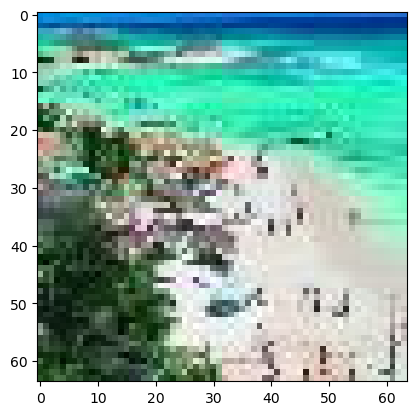

In [24]:
new_image_path = list(images_path.values())[random.randrange(0, len(folders) * n_imgs - 1)]
new_img = cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
# Resize the image to the size required by the model
target_size = (224, 224)
new_img = cv2.resize(new_img, target_size)
# Add a dimension
new_img = np.expand_dims(new_img, axis=0)
# Normalize the image
new_img = preprocess_input(new_img)

# Extract the features of the image
features_img = model.predict(new_img)
features_flat = features_img.reshape(1, -1)
distance, indices = knn.kneighbors(features_flat, n_neighbors=5)

idx_distance = list(zip(indices[0], distance[0]))
idx_sorted = [tup[0] for tup in sorted(idx_distance, key=lambda x: x[1])]
ids = []
for idx in idx_sorted:
    folder = str(int(features[idx, 0]))
    img_number = str(int(features[idx, 1]))
    ids.append((folder, img_number))


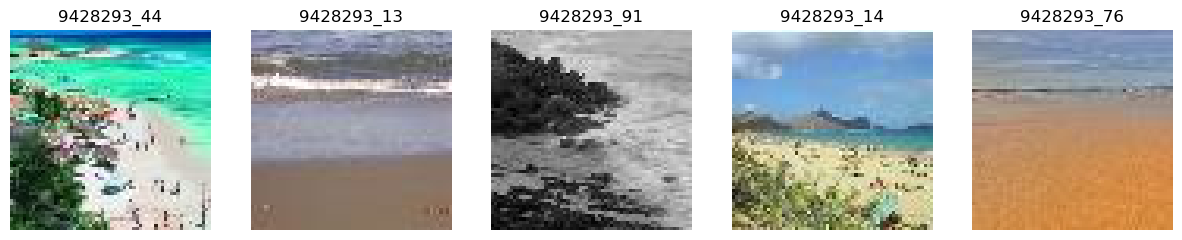

In [25]:
display_n_similar(ids, 5)